In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, uniform

In [3]:
def simulate(v, alpha, dt=0.001, G=9.81):
    v_x = v * np.cos(alpha)  # x velocity m/s
    v_y = v * np.sin(alpha)  # y velocity m/s
    
    x = 0.0  # initial position
    y = 1.5  # initial height
    trajectory = [(x, y)]

    while y > 0:  # simulate until ball hits floor
        v_y += dt * -G  # acceleration due to gravity
        x += dt * v_x
        y += dt * v_y
        trajectory.append((x, y))
        
    return np.array(trajectory)

In [23]:
norm(loc=5,scale=0.5).ppf([0.5,0.6,0.8])

array([5.        , 5.12667355, 5.42081062])

In [5]:
 # observational model
def likelihood(v, alpha): 
    trajectory = simulate(v, alpha)
    x = trajectory[-1, 0]
    return norm(loc=x, scale=0.5)

# prior model  
p_v = uniform(0., 10.0)    # start with [0,1] and discuss
p_alpha = uniform(0., np.pi / 2)   # start with [-pi;pi]

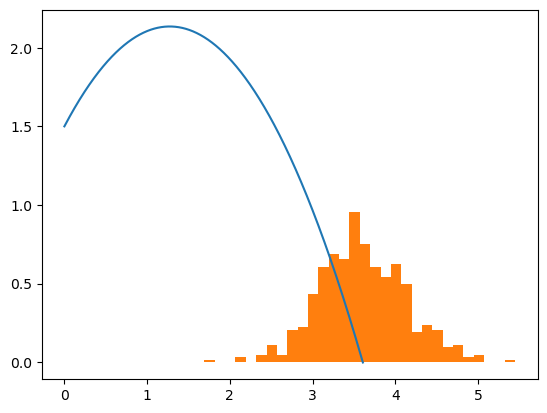

In [26]:
# p(x | v, alpha)
v = 5.0
alpha = np.pi / 4.0

trajectory = simulate(v, alpha)
plt.plot(trajectory[:, 0], trajectory[:, 1])

lk = likelihood(v, alpha)
xs = lk.rvs(500)
plt.hist(xs, density=True, bins=30)

plt.show()

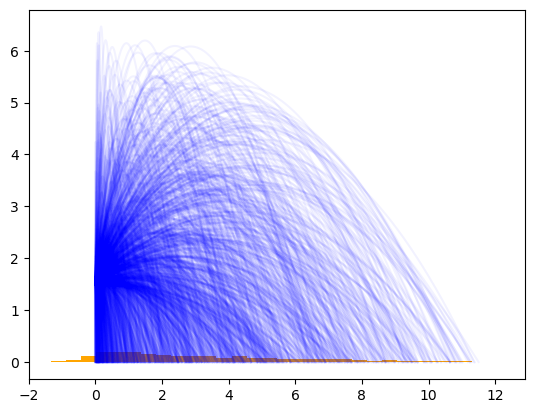

In [35]:
# p(x)
xs = []

for i in range(2000):
    v = p_v.rvs()
    alpha = p_alpha.rvs()
    trajectory = simulate(v, alpha)
    plt.plot(trajectory[:, 0], trajectory[:, 1], color="b", alpha=0.05)
    x = likelihood(v, alpha).rvs()
    xs.append(x)
    
plt.hist(xs, density=True, bins=30, color="orange")
plt.show()

## DATA ##

In [51]:
v_true = 5.0
alpha_true = np.pi / 4
x_obs = likelihood(v_true, alpha_true).rvs()

In [50]:
trajectory = simulate(v_true, alpha_true)
lk = likelihood(v_true, alpha_true)

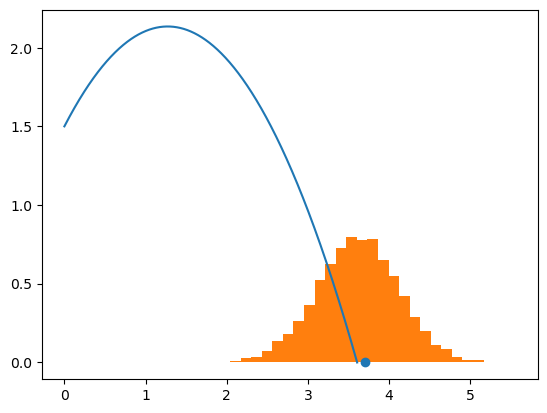

In [48]:
xs = lk.rvs(10000)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.hist(xs, density=True, bins=30)
plt.scatter([x_obs], [0.])
plt.show()

In [27]:
# Point-valued estimate
from scipy.optimize import minimize

def log_likelihood(theta, x):
    v, alpha = theta
    lk = likelihood(v, alpha)
    return lk.logpdf(x)

what is the optimal parameter ?

In [36]:
nll = lambda *args: -log_likelihood(*args)
initial = np.array([p_v.rvs(), p_alpha.rvs()])
soln = minimize(nll, initial, args=(x_obs,))
soln

NameError: name 'x_obs' is not defined

In [30]:
log_likelihood([20,10],5)

-103.85877798136264